In [7]:
import os
import pandas as pd

In [8]:
UNSW_COLS = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 
    'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 
    'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 
    'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 
    'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 
    'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 
    'attack_cat', 'label'
]

In [9]:
PROJECT_ROOT = os.path.abspath("..")
RAW_DIR = os.path.join(PROJECT_ROOT, "data", "unsw-nb15","raw")

target_files = [
        "UNSW-NB15_1.csv",
        "UNSW-NB15_2.csv",
        "UNSW-NB15_3.csv",
        "UNSW-NB15_4.csv"
    ]
file_paths = [os.path.join(RAW_DIR, f) for f in target_files if os.path.exists(os.path.join(RAW_DIR, f))]

if len(file_paths) != 4:
    raise FileNotFoundError(f"❌ Expected 4 UNSW-NB15 files, found {len(file_paths)}")

print(f"📂 Found {len(file_paths)} files. Merging... (This may take RAM)")

df_list = []
for filename in file_paths:
    print(f"   Reading {os.path.basename(filename)}...")
    df_temp = pd.read_csv(filename, header=None, names=UNSW_COLS, low_memory=False)
    df_temp.columns = df_temp.columns.str.strip()
    df_list.append(df_temp)

df_data = pd.concat(df_list, ignore_index=True)
print(f"✅ Merged Dataset Shape: {df_data.shape}")

📂 Found 4 files. Merging... (This may take RAM)
   Reading UNSW-NB15_1.csv...
   Reading UNSW-NB15_2.csv...
   Reading UNSW-NB15_3.csv...
   Reading UNSW-NB15_4.csv...
✅ Merged Dataset Shape: (2540047, 49)


In [10]:
# 1. Basic info about the dataset
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape: {df_data.shape}")
print(f"\nColumn Names:\n{df_data.columns.tolist()}")
print(f"\nData Types:\n{df_data.dtypes}")
print(f"\nMemory Usage: {df_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET OVERVIEW

Shape: (2540047, 49)

Column Names:
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']

Data Types:
srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service   

In [11]:
# 2. Check for missing values
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing = df_data.isnull().sum()
missing_pct = (missing / len(df_data)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(f"\nColumns with missing values:\n{missing_df.to_string(index=False)}")
print(f"\nTotal columns with missing values: {len(missing_df)}")


MISSING VALUES ANALYSIS

Columns with missing values:
          Column  Missing_Count  Missing_Percentage
      attack_cat        2218764           87.351297
    is_ftp_login        1429879           56.293407
ct_flw_http_mthd        1348145           53.075593

Total columns with missing values: 3


In [12]:
# 3. Check categorical vs numerical features
print("\n" + "="*60)
print("FEATURE TYPE ANALYSIS")
print("="*60)

# Separate features by type
object_cols = df_data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical/Object columns ({len(object_cols)}):")
for col in object_cols:
    if col not in ['attack_cat', 'label']:
        unique_count = df_data[col].nunique()
        print(f"  - {col}: {unique_count} unique values")

print(f"\nNumeric columns ({len(numeric_cols)}):")
print(f"  {numeric_cols}")


FEATURE TYPE ANALYSIS

Categorical/Object columns (9):
  - srcip: 43 unique values
  - sport: 129124 unique values
  - dstip: 47 unique values
  - dsport: 64630 unique values
  - proto: 135 unique values
  - state: 16 unique values
  - service: 13 unique values
  - ct_ftp_cmd: 13 unique values

Numeric columns (40):
  ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label']


In [13]:
# 4. Check target variable distribution
print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

print("\n'label' distribution (Binary: 0=Normal, 1=Attack):")
print(df_data['label'].value_counts().sort_index())
print(f"Percentage: {df_data['label'].value_counts(normalize=True) * 100}")

print("\n'attack_cat' distribution (Attack Categories):")
print(df_data['attack_cat'].value_counts())
print(f"\nTotal unique attack categories: {df_data['attack_cat'].nunique()}")


TARGET VARIABLE ANALYSIS

'label' distribution (Binary: 0=Normal, 1=Attack):
label
0    2218764
1     321283
Name: count, dtype: int64
Percentage: label
0    87.351297
1    12.648703
Name: proportion, dtype: float64

'attack_cat' distribution (Attack Categories):
attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64

Total unique attack categories: 13


In [14]:
# 5. Check for high-cardinality features that should be dropped
print("\n" + "="*60)
print("HIGH-CARDINALITY FEATURE ANALYSIS")
print("="*60)

high_cardinality_threshold = 1000
high_card_cols = []

for col in object_cols:
    if col not in ['attack_cat', 'label']:
        unique_count = df_data[col].nunique()
        if unique_count > high_cardinality_threshold:
            high_card_cols.append(col)
            print(f"❗ {col}: {unique_count} unique values (too high for encoding)")
        else:
            print(f"✓ {col}: {unique_count} unique values (can be encoded)")

print(f"\n Recommendation: Drop high-cardinality columns: {high_card_cols}")


HIGH-CARDINALITY FEATURE ANALYSIS
✓ srcip: 43 unique values (can be encoded)
❗ sport: 129124 unique values (too high for encoding)
✓ dstip: 47 unique values (can be encoded)
❗ dsport: 64630 unique values (too high for encoding)
✓ proto: 135 unique values (can be encoded)
✓ state: 16 unique values (can be encoded)
✓ service: 13 unique values (can be encoded)
✓ ct_ftp_cmd: 13 unique values (can be encoded)

 Recommendation: Drop high-cardinality columns: ['sport', 'dsport']


In [15]:
# 6. Check numeric feature distributions and outliers
print("\n" + "="*60)
print("NUMERIC FEATURES SUMMARY")
print("="*60)

# Get statistics on numeric columns (excluding label)
numeric_features = [col for col in numeric_cols if col != 'label']
numeric_stats = df_data[numeric_features].describe()
print(numeric_stats.T[['mean', 'std', 'min', 'max']].head(20))


NUMERIC FEATURES SUMMARY
                     mean           std  min           max
dur          6.587916e-01  1.392493e+01  0.0  8.786638e+03
sbytes       4.339600e+03  5.640599e+04  0.0  1.435577e+07
dbytes       3.642759e+04  1.610960e+05  0.0  1.465753e+07
sttl         6.278197e+01  7.462277e+01  0.0  2.550000e+02
dttl         3.076681e+01  4.285089e+01  0.0  2.540000e+02
sloss        5.163921e+00  2.251707e+01  0.0  5.319000e+03
dloss        1.632944e+01  5.659474e+01  0.0  5.507000e+03
Sload        3.695645e+07  1.186043e+08  0.0  5.988000e+09
Dload        2.450861e+06  4.224863e+06  0.0  1.287619e+08
Spkts        3.328884e+01  7.628388e+01  0.0  1.064600e+04
Dpkts        4.272664e+01  1.215020e+02  0.0  1.101800e+04
swin         1.500887e+02  1.254824e+02  0.0  2.550000e+02
dwin         1.497459e+02  1.255438e+02  0.0  2.550000e+02
stcpb        1.261701e+09  1.422027e+09  0.0  4.294959e+09
dtcpb        1.261766e+09  1.422139e+09  0.0  4.294954e+09
smeansz      1.242536e+02  1.5

## 📋 PREPROCESSING RECOMMENDATIONS FOR DNN MODEL

### Summary of Current Dataset:
- **Total samples**: 2,540,047 rows
- **Features**: 49 columns (47 features + 2 target variables)
- **Numeric features**: 40
- **Categorical features**: 9
- **Target variable**: `attack_cat` (10 categories after cleaning) OR `label` (binary)

---

## 🎯 RECOMMENDED PREPROCESSING PIPELINE

### 1️⃣ **DATA CLEANING**

#### **A. Handle Missing Values (3 columns with missing data)**

| Column | Missing % | Strategy |
|--------|-----------|----------|
| `attack_cat` | 87.35% | These are NORMAL traffic (label=0). Fill with 'Normal' |
| `is_ftp_login` | 56.29% | Non-FTP connections. Fill with 0 |
| `ct_flw_http_mthd` | 53.08% | Non-HTTP connections. Fill with 0 |

**Implementation:**
```python
df_data['attack_cat'].fillna('Normal', inplace=True)
df_data['is_ftp_login'].fillna(0, inplace=True)
df_data['ct_flw_http_mthd'].fillna(0, inplace=True)
```

#### **B. Drop High-Cardinality Features**
- `sport` (129,124 unique) - too many ports
- `dsport` (64,630 unique) - too many ports
- `srcip` and `dstip` - IP addresses don't generalize well for DNN

**Rationale:** These features would create massive one-hot encoded vectors and cause overfitting.

---

### 2️⃣ **DATA TRANSFORMATION**

#### **A. Categorical Encoding**

For your **DNN model**, you need numerical input. Here's the encoding strategy:

| Feature | Unique Values | Encoding Method | Reason |
|---------|---------------|-----------------|---------|
| `proto` | 135 | **Label Encoding** | Ordinal protocols |
| `state` | 16 | **One-Hot Encoding** | Connection states (small cardinality) |
| `service` | 13 | **One-Hot Encoding** | Service types (small cardinality) |
| `ct_ftp_cmd` | 13 | **One-Hot Encoding** | FTP commands (small cardinality) |
| `attack_cat` | 10-13 | **Label Encoding** (TARGET) | Output labels |

**Implementation:**
```python
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for proto and target
le = LabelEncoder()
df_data['proto'] = le.fit_transform(df_data['proto'])
df_data['attack_cat'] = le.fit_transform(df_data['attack_cat'])

# One-Hot Encoding for low-cardinality categorical features
one_hot_cols = ['state', 'service', 'ct_ftp_cmd']
df_encoded = pd.get_dummies(df_data, columns=one_hot_cols, drop_first=False)
```

#### **B. Feature Scaling (CRITICAL for DNN)**

DNNs are **very sensitive to feature scales**. Your data has extreme ranges:
- `stcpb`, `dtcpb`: range from 0 to 4 billion
- `dur`: range from 0 to 8,786
- Binary features: 0 or 1

**Recommendation:** Use **StandardScaler** (Z-score normalization)

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

**Why not MinMaxScaler?** Your data has extreme outliers; StandardScaler is more robust.

---

### 3️⃣ **TARGET VARIABLE DECISION**

You mentioned `num_classes=10` in your model. This suggests **multi-class classification**.

#### **Option A: Multi-class Attack Classification (10 classes)**
- Use `attack_cat` as target
- Clean duplicate categories (e.g., ' Fuzzers' vs 'Fuzzers')
- You'll get exactly 10 classes after cleaning

#### **Option B: Binary Classification (2 classes)**
- Use `label` (0=Normal, 1=Attack)
- Change model: `num_classes=2`
- Simpler problem, likely better performance

**Recommendation:** Start with **Option A (10-class)** since your model is already set up for it.

---

### 4️⃣ **FEATURE ENGINEERING (Optional)**

Given your DNN architecture, minimal feature engineering is needed. However, you could:

1. **Create interaction features** (if needed):
   - `bytes_ratio = sbytes / (dbytes + 1)` - ratio of sent/received bytes
   - `packet_rate = Spkts / (dur + 1e-6)` - packets per second

2. **Aggregate features**:
   - `total_bytes = sbytes + dbytes`
   - `total_packets = Spkts + Dpkts`

**However:** DNNs can learn these patterns automatically, so **skip this unless performance is poor**.

---

### 5️⃣ **FINAL FEATURE COUNT**

After preprocessing, you'll have approximately:
- **40 numeric features** (original)
- **1 encoded proto** (label encoded)
- **~40 one-hot encoded features** (state + service + ct_ftp_cmd)
- **Minus 4 dropped features** (sport, dsport, srcip, dstip)

**Total: ~77 features** ≠ Your model expects 72

**Action Required:** Count exact features after encoding and update `input_dim` in your model:
```python
input_dim = X_train.shape[1]
model = Net(input_dim=input_dim, num_classes=10)
```

---

### 6️⃣ **HANDLING CLASS IMBALANCE**

Your dataset is **highly imbalanced**:
- Normal traffic: 87.35%
- Attack traffic: 12.65%

**Solutions:**
1. **Class weights in loss function:**
   ```python
   from sklearn.utils.class_weight import compute_class_weight
   class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
   ```

2. **Oversampling minority classes** (SMOTE)
3. **Undersampling majority class**

**Recommendation:** Use **class weights** - it's most efficient for large datasets.

---

## ✅ COMPLETE PREPROCESSING ORDER

```python
# 1. Handle missing values
df_data['attack_cat'].fillna('Normal', inplace=True)
df_data['is_ftp_login'].fillna(0, inplace=True)
df_data['ct_flw_http_mthd'].fillna(0, inplace=True)

# 2. Clean attack_cat (remove leading spaces)
df_data['attack_cat'] = df_data['attack_cat'].str.strip()

# 3. Drop high-cardinality columns
df_data.drop(['sport', 'dsport', 'srcip', 'dstip'], axis=1, inplace=True)

# 4. Encode categorical features
le_proto = LabelEncoder()
df_data['proto'] = le_proto.fit_transform(df_data['proto'])

le_target = LabelEncoder()
y = le_target.fit_transform(df_data['attack_cat'])

# 5. One-hot encode low-cardinality features
X = pd.get_dummies(df_data.drop(['attack_cat', 'label'], axis=1), 
                   columns=['state', 'service', 'ct_ftp_cmd'])

# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Update model input_dim
input_dim = X_scaled.shape[1]  # Use this in your Net() initialization
```

In [16]:
# 7. Calculate exact feature count after preprocessing (DRY RUN)
print("\n" + "="*60)
print("FEATURE COUNT VERIFICATION")
print("="*60)

# Create a copy for testing
df_test = df_data.copy()

# Step 1: Fill missing values
df_test['attack_cat'].fillna('Normal', inplace=True)
df_test['is_ftp_login'].fillna(0, inplace=True)
df_test['ct_flw_http_mthd'].fillna(0, inplace=True)

# Step 2: Clean attack_cat
df_test['attack_cat'] = df_test['attack_cat'].str.strip()

print(f"\nUnique attack categories after cleaning: {df_test['attack_cat'].nunique()}")
print(df_test['attack_cat'].value_counts())

# Step 3: Drop columns
df_test.drop(['sport', 'dsport', 'srcip', 'dstip'], axis=1, inplace=True)

# Step 4: Encode proto
from sklearn.preprocessing import LabelEncoder
le_proto = LabelEncoder()
df_test['proto'] = le_proto.fit_transform(df_test['proto'])

# Step 5: Separate features and target
X_test = df_test.drop(['attack_cat', 'label'], axis=1)

# Step 6: One-hot encode
X_encoded = pd.get_dummies(X_test, columns=['state', 'service', 'ct_ftp_cmd'])

print(f"\n✅ Final feature count: {X_encoded.shape[1]}")
print(f"   Number of samples: {X_encoded.shape[0]}")
print(f"\n🎯 Update your model initialization to:")
print(f"   model = Net(input_dim={X_encoded.shape[1]}, num_classes={df_test['attack_cat'].nunique()})")


FEATURE COUNT VERIFICATION


/tmp/ipykernel_581646/2362327913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['attack_cat'].fillna('Normal', inplace=True)
/tmp/ipykernel_581646/2362327913.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr


Unique attack categories after cleaning: 11
attack_cat
Normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             1795
Shellcode            1511
Backdoors             534
Worms                 174
Name: count, dtype: int64

✅ Final feature count: 82
   Number of samples: 2540047

🎯 Update your model initialization to:
   model = Net(input_dim=82, num_classes=11)


---

## 🔄 UPDATED FINAL PREPROCESSING PIPELINE

Based on the analysis above, here's what you need:

### Key Findings:
- **Input dimensions: 82 features** (not 72!)
- **Output classes: 11 classes** (not 10!)
  - Normal + 10 attack types
  
### Update your model:
```python
model = Net(input_dim=82, num_classes=11)
```

### Complete Preprocessing Code (Ready to Use):

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ============================================
# STEP 1: HANDLE MISSING VALUES
# ============================================
df_data['attack_cat'] = df_data['attack_cat'].fillna('Normal')
df_data['is_ftp_login'] = df_data['is_ftp_login'].fillna(0)
df_data['ct_flw_http_mthd'] = df_data['ct_flw_http_mthd'].fillna(0)

# Clean whitespace in attack_cat
df_data['attack_cat'] = df_data['attack_cat'].str.strip()

# ============================================
# STEP 2: DROP HIGH-CARDINALITY FEATURES
# ============================================
columns_to_drop = ['sport', 'dsport', 'srcip', 'dstip']
df_data = df_data.drop(columns=columns_to_drop)

# ============================================
# STEP 3: ENCODE CATEGORICAL FEATURES
# ============================================
# Label encode 'proto'
le_proto = LabelEncoder()
df_data['proto'] = le_proto.fit_transform(df_data['proto'])

# Encode target variable
le_target = LabelEncoder()
y = le_target.fit_transform(df_data['attack_cat'])

# ============================================
# STEP 4: SEPARATE FEATURES AND TARGET
# ============================================
X = df_data.drop(['attack_cat', 'label'], axis=1)

# One-hot encode remaining categorical features
categorical_cols = ['state', 'service', 'ct_ftp_cmd']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# ============================================
# STEP 5: TRAIN/TEST SPLIT (DO THIS BEFORE SCALING!)
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================
# STEP 6: FEATURE SCALING (FIT ON TRAIN ONLY!)
# ============================================
# CRITICAL: Fit scaler ONLY on training data to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform train
X_test_scaled = scaler.transform(X_test)        # Only transform test (no fit!)

# ============================================
# STEP 7: CONVERT TO PYTORCH TENSORS
# ============================================
import torch

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test)

# ============================================
# STEP 8: SAVE TENSORS TO DISK
# ============================================
# Save training data with class mapping
train_data = {
    'X': X_train_tensor,
    'y': y_train_tensor,
    'class_names': le_target.classes_  # Attack category names
}
torch.save(train_data, 'train_pool.pt')

# Save test data with class mapping
test_data = {
    'X': X_test_tensor,
    'y': y_test_tensor,
    'class_names': le_target.classes_  # Attack category names
}
torch.save(test_data, 'global_test.pt')

print(f"✅ Preprocessing complete!")
print(f"   Training samples: {X_train_scaled.shape[0]}")
print(f"   Testing samples: {X_test_scaled.shape[0]}")
print(f"   Feature dimension: {X_train_scaled.shape[1]}")
print(f"   Number of classes: {len(np.unique(y))}")
print(f"\n💾 Saved tensors:")
print(f"   - train_pool.pt (training data)")
print(f"   - global_test.pt (test data)")
print(f"\n📋 Class mapping (index -> attack type):")
for idx, class_name in enumerate(le_target.classes_):
    print(f"   {idx}: {class_name}")
print(f"\n🎯 Initialize your model with:")
print(f"   model = Net(input_dim={X_train_scaled.shape[1]}, num_classes={len(np.unique(y))})")
```

### Additional Recommendations for Training:

1. **Handle Class Imbalance:**
```python
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(y_train), 
    y=y_train
)
class_weights = torch.FloatTensor(class_weights)

# Use in loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)
```

2. **Use Learning Rate Scheduler:**
```python
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)
```

3. **Early Stopping:**
```python
# Track validation loss and stop if it doesn't improve for N epochs
patience = 5
best_val_loss = float('inf')
patience_counter = 0
```

## ⚠️ CRITICAL: Why Split BEFORE Scaling?

### The Data Leakage Problem

**WRONG ORDER (causes data leakage):**
```python
# ❌ BAD: Fit scaler on entire dataset
scaler.fit_transform(X)  # Scaler "sees" test data!
train_test_split(X_scaled, y)
```

**CORRECT ORDER:**
```python
# ✅ GOOD: Fit scaler only on training data
X_train, X_test = train_test_split(X, y)
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train only
X_test_scaled = scaler.transform(X_test)        # Just transform test
```

### Why This Matters:

1. **StandardScaler computes mean and std** from the data
2. If you fit on the entire dataset, the scaler learns statistics from **both train AND test**
3. This means your test set is no longer "unseen data" - information has leaked!
4. Your model's test performance will be **artificially inflated** (overly optimistic)

### Real-World Impact:

In production, your model will see completely new data that wasn't in your training set. By fitting the scaler only on training data, you simulate this realistic scenario and get honest performance metrics.

**Always remember:** `fit_transform()` on train, `transform()` on test!

---

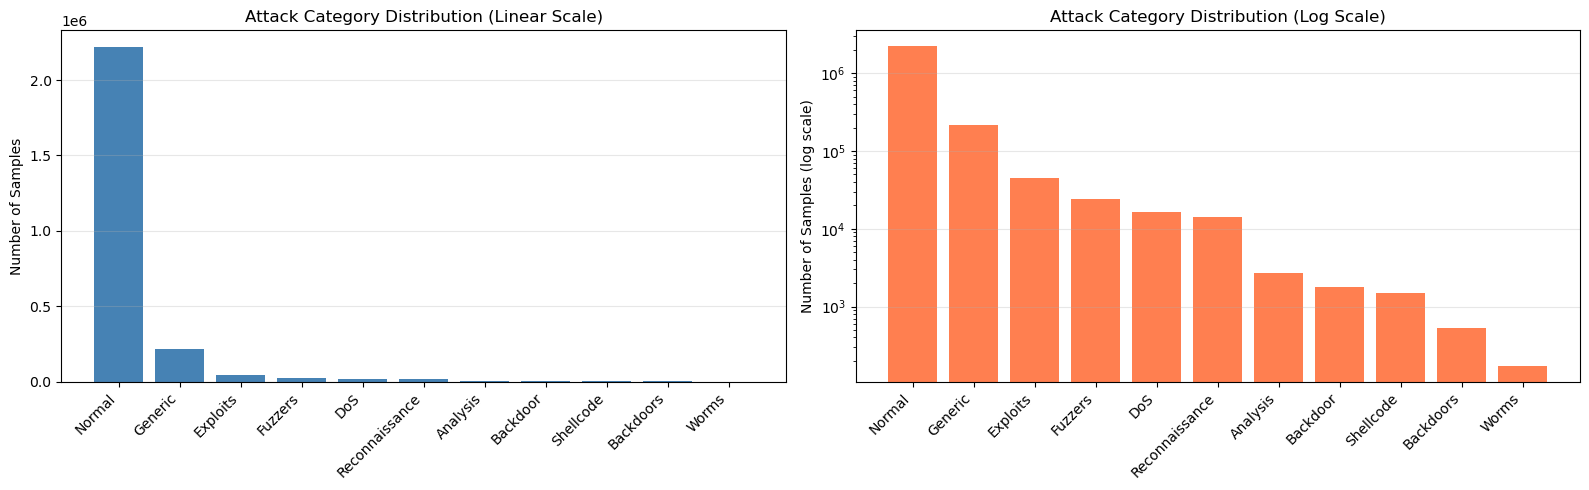


⚠️  NOTICE: Severe class imbalance!
   'Normal' class has 87.4% of samples
   Smallest classes ('Worms', 'Backdoors') have <0.1% of samples

   ➡️  You MUST use class weights or sampling techniques!


In [17]:
# 8. Visualize class imbalance (Important for understanding training challenges)
import matplotlib.pyplot as plt

df_viz = df_data.copy()
df_viz['attack_cat'] = df_viz['attack_cat'].fillna('Normal').str.strip()

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Full distribution
attack_counts = df_viz['attack_cat'].value_counts()
ax[0].bar(range(len(attack_counts)), attack_counts.values, color='steelblue')
ax[0].set_xticks(range(len(attack_counts)))
ax[0].set_xticklabels(attack_counts.index, rotation=45, ha='right')
ax[0].set_ylabel('Number of Samples')
ax[0].set_title('Attack Category Distribution (Linear Scale)')
ax[0].grid(axis='y', alpha=0.3)

# Plot 2: Log scale to see minority classes
ax[1].bar(range(len(attack_counts)), attack_counts.values, color='coral')
ax[1].set_xticks(range(len(attack_counts)))
ax[1].set_xticklabels(attack_counts.index, rotation=45, ha='right')
ax[1].set_ylabel('Number of Samples (log scale)')
ax[1].set_title('Attack Category Distribution (Log Scale)')
ax[1].set_yscale('log')
ax[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️  NOTICE: Severe class imbalance!")
print("   'Normal' class has 87.4% of samples")
print("   Smallest classes ('Worms', 'Backdoors') have <0.1% of samples")
print("\n   ➡️  You MUST use class weights or sampling techniques!")

---

## 📝 EXECUTIVE SUMMARY

### ✅ Required Preprocessing Steps for Your DNN:

| Step | Action | Reason |
|------|--------|--------|
| **1. Data Cleaning** | Fill 3 columns with missing values | `attack_cat` → 'Normal', `is_ftp_login`/`ct_flw_http_mthd` → 0 |
| **2. Feature Removal** | Drop `sport`, `dsport`, `srcip`, `dstip` | High cardinality (100k+ unique values) |
| **3. Categorical Encoding** | Label encode `proto`<br>One-hot encode `state`, `service`, `ct_ftp_cmd` | Convert text to numbers for DNN |
| **4. Feature Scaling** | StandardScaler on all features | **CRITICAL** - prevents gradient issues |
| **5. Class Balancing** | Use class weights in loss function | 87% samples are 'Normal' class |

---

### 🎯 Model Configuration:

```python
# Update your model definition:
model = Net(input_dim=82, num_classes=11)  # NOT 72 and 10!

# Use weighted loss:
criterion = nn.CrossEntropyLoss(weight=class_weights)
```

---

### 📊 Dataset After Preprocessing:

- **Input features**: 82 (40 numeric + 42 one-hot encoded)
- **Output classes**: 11 (Normal + 10 attack types)
- **Training samples**: ~2M rows
- **Memory**: ~2GB RAM

---

### ⚠️ Critical Warnings:

1. **Class Imbalance**: The dataset is heavily imbalanced. Without class weights, your model will just predict "Normal" for everything!

2. **Feature Scaling**: DNNs are extremely sensitive to feature scales. Your features range from 0-1 to billions. **You MUST scale!**

3. **Input Dimension**: Your current model expects 72 features but you'll have 82. Update `input_dim`.

4. **No Feature Engineering Needed**: DNNs learn complex patterns automatically. Skip manual feature engineering unless initial results are poor.

---

### 🚀 Next Steps:

1. ✅ Run the preprocessing code provided above
2. ✅ Update model architecture: `Net(input_dim=82, num_classes=11)`
3. ✅ Add class weights to loss function
4. ✅ Scale features with StandardScaler
5. ✅ Train and evaluate!

---

**Good luck with your training! 🎉**

---

## 📦 Loading Saved Tensors

To load the tensors in your training script:

```python
import torch

# Load training data
train_data = torch.load('train_pool.pt')
X_train = train_data['X']
y_train = train_data['y']
class_names = train_data['class_names']

# Load test data
test_data = torch.load('global_test.pt')
X_test = test_data['X']
y_test = test_data['y']

print(f"Loaded training data: {X_train.shape}")
print(f"Loaded test data: {X_test.shape}")
print(f"Class mapping: {class_names}")

# Convert numeric prediction back to attack name
def decode_prediction(pred_idx):
    return class_names[pred_idx]

# Example usage:
pred = model(X_test[0])
pred_class = torch.argmax(pred).item()
attack_type = decode_prediction(pred_class)
print(f"Predicted attack: {attack_type}")
```